#   class { 0: 姿勢正確      1: 姿勢不良 }

In [1]:
# ! pip install tensorflow==2.3.0
# ! pip install tf-nightly
# ! pip install tensorflow==2.1.0
import logging
logging.getLogger("tensorflow").setLevel(logging.DEBUG)

In [2]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
print(tf.__version__)

2.3.0


Using TensorFlow backend.


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Input
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# from tensorflow.keras.applications import MobileNet
# from tensorflow.keras.activations import relu
#      BatchNormalization, AveragePooling2D
# from tensorflow.keras.utils import np_utils
#, Model #, DepthwiseConv2D, \

In [4]:
# 全域性變數
nb_classes = 2   # class 0: (沒在桌前)等待狀態 ， 1: 姿勢正確 2: 姿勢不良
image_height, image_width  = 32, 32  # image_height, image_width   ; img_rows, img_cols
# image_height, image_width  = 96, 96  # image_height, image_width   ; img_rows, img_cols
input_size = (image_height, image_width)  # image_height, image_width
input_shape=(image_height, image_width, 1)  # 不需要彩色特徵  # image_height, image_width
print('input_shape=(image_height, image_width, 1) : ({},{},{})'.format(image_height, image_width, 1))
# nb_filters = 24
# pool_size = (3,3)
# strides = (3,3)   # (1, 1)
# kernel_size = (3,3)
# epochs = 12
# input image dimensions  (image_height, image_width, color_channels)
# batch_size = 20

input_shape=(image_height, image_width, 1) : (32,32,1)


In [5]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True   # because some image(data) issue

# color_mode: One of "grayscale",
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True
        )
test_datagen = ImageDataGenerator(rescale=1./255
                                 )
train_generator = train_datagen.flow_from_directory(
        './data',
        color_mode='grayscale',
        target_size=input_size,  # col = w , row = h
        batch_size=50,   # batch_size * steps_per_epoch <= Found images
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        './datav',
        color_mode='grayscale',
        target_size=input_size, # col = w , row = h
        batch_size=15,
        class_mode='categorical')

Found 1383 images belonging to 2 classes.
Found 157 images belonging to 2 classes.


In [6]:
#構建模型
# input_shape=(image_height, image_width, 1) : (48,64,1)
model = Sequential()
model.add(Convolution2D(12,(3,3),strides=(1,1), input_shape=input_shape, activation='relu'))  # , activation='relu'
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Convolution2D(8,(3,3),strides=(1,1), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Dropout(0.2)) 
model.add(Flatten()) 
model.add(Dense(2, activation='softmax')) # , activation='softmax'
model.summary()

optimizer = tf.keras.optimizers.Adam(lr=0.01,beta_1=0.9,beta_2=0.999,epsilon=None,decay=0.0001,amsgrad=False)
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 12)        120       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 12)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 8)         872       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 8)           0         
_________________________________________________________________
dropout (Dropout)            (None, 6, 6, 8)           0         
_________________________________________________________________
flatten (Flatten)            (None, 288)               0         
_________________________________________________________________
dense (Dense)                (None, 2)                 5

In [7]:
model.fit_generator(
        train_generator,
        steps_per_epoch=20,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=10,
        verbose=2)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
20/20 - 4s - loss: 0.6919 - accuracy: 0.5280 - val_loss: 0.6740 - val_accuracy: 0.5667
Epoch 2/50
20/20 - 4s - loss: 0.6185 - accuracy: 0.6663 - val_loss: 0.5863 - val_accuracy: 0.7267
Epoch 3/50
20/20 - 4s - loss: 0.5418 - accuracy: 0.7223 - val_loss: 0.5346 - val_accuracy: 0.7533
Epoch 4/50
20/20 - 4s - loss: 0.5418 - accuracy: 0.7457 - val_loss: 0.4994 - val_accuracy: 0.7667
Epoch 5/50
20/20 - 4s - loss: 0.5233 - accuracy: 0.7520 - val_loss: 0.4788 - val_accuracy: 0.7933
Epoch 6/50
20/20 - 4s - loss: 0.5133 - accuracy: 0.7558 - val_loss: 0.4760 - val_accuracy: 0.7733
Epoch 7/50
20/20 - 4s - loss: 0.5002 - accuracy: 0.7609 - val_loss: 0.4096 - val_accuracy: 0.8133
Epoch 8/50
20/20 - 4s - loss: 0.5100 - accuracy: 0.7548 - val_loss: 0.4472 - val_accuracy: 0.8133
Epoch 9/50
20/20 - 4s - loss: 0.4739 - accuracy: 0.7803 - val_loss: 0.4062 - val_accuracy: 0.8333
Epoch 10/50
20/20 - 4s - loss: 0.4619 - ac

In [8]:
model.save('./babysit.h5')
model.save('./babysit')
! ls "./babysit.h5" -l

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ./babysit/assets
-rw-r--r-- 1 Kneron Kneron 54480 Dec  5 14:36 ./babysit.h5


image.size:  (32, 32)
input_arr.shape:  (1, 32, 32, 1)
[[0.05224722 0.9477528 ]]


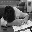

In [9]:
#### keras data preprocess 已經幫忙轉過 array 軸對調 ，所以 target_size=input_size 然後輸出相反是正確的
from tensorflow.keras.preprocessing.image import load_img, img_to_array

image = load_img('./datat/02.jpg',   # 1217 x 749  
                 color_mode="grayscale", 
                 target_size=input_size)  # input_shape=(image_height, image_width, 1) : (320,480,1)
print('image.size: ', image.size) # !!!!!!!!!  changr axis T  (480, 320) image_width, image_height  !!!!!!!!!!!!!!
# input_shape=(image_height, image_width, 1) : (320,480,1)
# input_arr = img_to_array(image)  #  (320, 480, 1)  # no change 
# print('input_arr.shape: ', input_arr.shape)  # image_height, image_width (320,480,1)
input_arr = np.array(image)  # Convert single image to a batch.
input_arr = input_arr.reshape(1,image_height, image_width,1)
print('input_arr.shape: ', input_arr.shape)
predictions = model.predict(input_arr/255.0)   #   /255.0
print(predictions)
display(image) # 圖像是正確的 

im0.size:  (240, 160)
im1.size (32, 32)
ima.shape:  (1, 32, 32, 1)
1
[[0.05800011 0.9419999 ]]


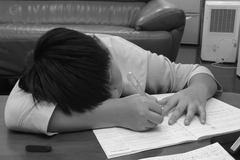

In [10]:
# # # Improting Image class from PIL module  
from PIL import Image  
import numpy as np 
# input_shape=(image_height, image_width, 1) : (320,480,1)
im = Image.open('./datat/02.jpg').convert('L')
im0 = im.resize((240, 160),Image.ANTIALIAS)    # image_width, image_height (480, 320)
print('im0.size: ', im0.size)
im1 = im.resize((image_width, image_height), Image.ANTIALIAS)   # image_width, image_height (480, 320)
print('im1.size', im1.size)
ima = np.array(im1)  
# input_shape=(image_height, image_width, 1) : (320,480,1)
ima = ima.reshape(1,image_height, image_width,1)  # !!!!!!!!!!!!!!!!  (1, 48, 64, 1)
print('ima.shape: ', ima.shape)
print(model.predict(ima/255).argmax())
print(model.predict(ima/255))
display(im0)

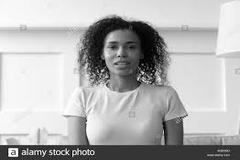

[[0.9923539 0.0076461]]
0
-----------------------------------------


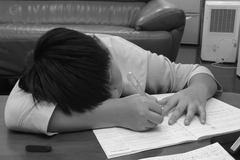

[[0.05800011 0.9419999 ]]
1
-----------------------------------------


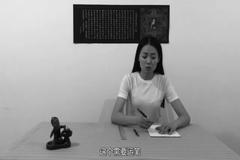

[[0.99693596 0.00306399]]
0
-----------------------------------------


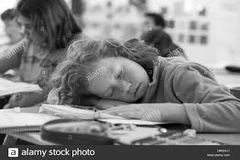

[[0.03609825 0.9639018 ]]
1
-----------------------------------------


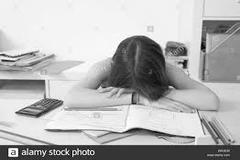

[[0.00121228 0.9987877 ]]
1
-----------------------------------------


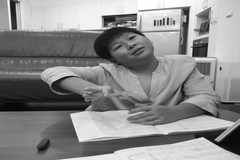

[[0.71143115 0.2885688 ]]
0
-----------------------------------------


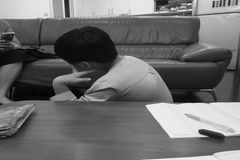

[[0.00954281 0.99045724]]
1
-----------------------------------------


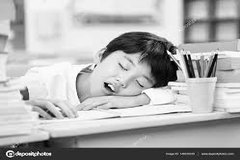

[[0.00276163 0.9972384 ]]
1
-----------------------------------------


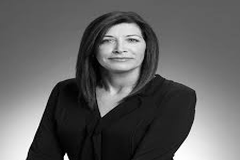

[[9.9983704e-01 1.6293001e-04]]
0
-----------------------------------------


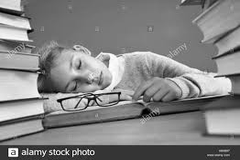

[[0.00543181 0.9945682 ]]
1
-----------------------------------------


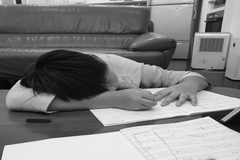

[[0.02177883 0.9782211 ]]
1
-----------------------------------------


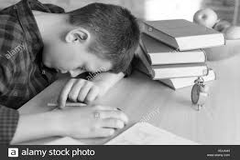

[[0.00842625 0.99157375]]
1
-----------------------------------------


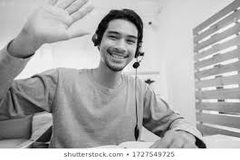

[[0.9986526  0.00134741]]
0
-----------------------------------------


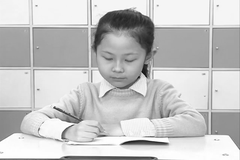

[[0.9874801  0.01251991]]
0
-----------------------------------------


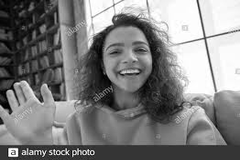

[[0.97958654 0.02041342]]
0
-----------------------------------------


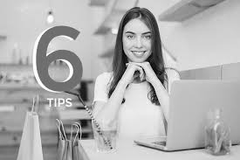

[[0.9871296  0.01287039]]
0
-----------------------------------------


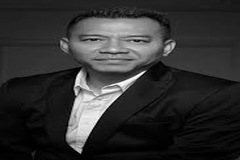

[[0.88401765 0.11598232]]
0
-----------------------------------------


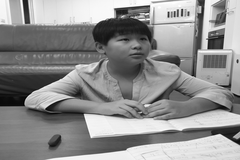

[[0.96127945 0.0387205 ]]
0
-----------------------------------------


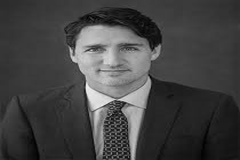

[[0.9967964  0.00320354]]
0
-----------------------------------------


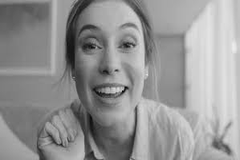

[[0.8817827  0.11821728]]
0
-----------------------------------------


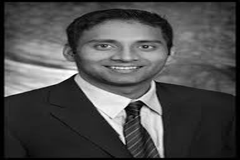

[[0.9912081  0.00879192]]
0
-----------------------------------------


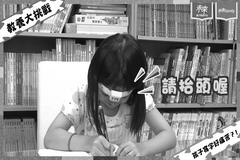

[[0.21530153 0.7846985 ]]
1
-----------------------------------------


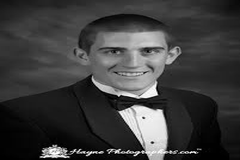

[[0.96967626 0.03032379]]
0
-----------------------------------------


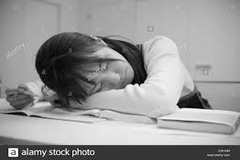

[[1.5910658e-04 9.9984086e-01]]
1
-----------------------------------------


In [11]:
import os
list_of_files = []
for (dirpath, dirnames, filenames) in os.walk('./datat'):
    for filename in filenames:
#         if filename.endswith('.jpg'): 
        list_of_files.append(filename)
# list_of_files

for img in list_of_files:

    # # input_shape=(image_height, image_width, 1) : (320,480,1)
    im = Image.open('./datat/{}'.format(img)).convert('L')       #.convert('L')  
    im0 = im.resize((240, 160),Image.ANTIALIAS)  
    im1 = im.resize((image_width, image_height), Image.ANTIALIAS)   # image_width, image_height  (64, 48)
    ima = np.array(im1)  # input_size = (48, 64) image_height , image_width
    ima = ima.reshape(1,image_height, image_width,1)  # !!!!!!!!!!!!!!!!  (1, 48, 64, 1)
    display(im0)
    print(model.predict(ima/255))
    print(model.predict(ima/255).argmax())
    print('-----------------------------------------')

In [12]:
# Define paths to model files
import os
MODELS_DIR = './'
if not os.path.exists(MODELS_DIR):
    os.mkdir(MODELS_DIR)
MODEL_TF = MODELS_DIR + 'model'                                # original keras model
MODEL_NO_QUANT_TFLITE = MODELS_DIR + 'model_no_quant.tflite'   # tflite convert model
MODEL_TFLITE = MODELS_DIR + 'g_person_detect_model_data'                     # tflite quantization model
# MODEL_TFLITE_MICRO = MODELS_DIR + 'person_detect_model_data.cpp'                   # xxd convert c++ data matrix

In [13]:
# Save the model to disk
model.save(MODEL_TF)
model.save('./model.h5')

INFO:tensorflow:Assets written to: ./model/assets


In [14]:
# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_saved_model(MODEL_TF)
model_no_quant_tflite = converter.convert()

# Save the model to disk
open(MODEL_NO_QUANT_TFLITE, "wb").write(model_no_quant_tflite)

9412

In [15]:
# import os
list_of_files = []
for (dirpath, dirnames, filenames) in os.walk('./data'):
    for filename in filenames:
        list_of_files.append(dirpath+'/'+filename)
print(len(list_of_files))            

1383


In [16]:
# # input_shape=(image_height, image_width, 1) : (320,480,1)
# (1,image_height, image_width,1)  # !!!!!!!!!!!!!!!!  (1,320,480,1)
data = np.empty((1,image_height, image_width,1), dtype=int)  # row , col for inference 
print('data.shape: ', data.shape)

for img in list_of_files[:10]: 
    im = Image.open(img).convert('L')  
#     im0 = im.resize((240, 160),Image.ANTIALIAS)  
    im1 = im.resize((image_width, image_height), Image.ANTIALIAS)   # image_width, image_height  (480, 320)
    ima = np.array(im1)  # input_size = (48, 64) image_height , image_width
    ima = ima.reshape(1,image_height, image_width,1)  # !!!!!!!!!!!!!!!!  (1,320,480,1)
    data = np.append(data, ima, axis=0).astype('float32')
print('data.shape: ', data.shape)

data.shape:  (1, 32, 32, 1)
data.shape:  (11, 32, 32, 1)


In [17]:
data = np.delete(data/255, [0], axis=0)
print('data.shape: ', data.shape) 

data.shape:  (10, 32, 32, 1)


In [18]:
# del(converter)
def representative_dataset():
    for i in range(1):  # this range is training epochs=100, from_keras_model  from_saved_model
        yield([data])
#    from_keras_model   from_saved_model    MODEL_TF  model
converter = tf.lite.TFLiteConverter.from_keras_model(model)        
converter.optimizations = [tf.lite.Optimize.DEFAULT]
# Enforce integer only quantization
# converter.target_spec.supported_ops = [tf.lite.OpsSet.EXPERIMENTAL_TFLITE_BUILTINS_ACTIVATIONS_INT16_WEIGHTS_INT8]

# converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
# converter.inference_input_type = tf.uint8
# converter.inference_output_type = tf.uint8
# # # # Provide a representative dataset to ensure we quantize correctly.
# converter.representative_dataset = representative_dataset   # mark for float32 input/output
model_tflite = converter.convert()

# Save the model to disk
open(MODEL_TFLITE, "wb").write(model_tflite)

INFO:tensorflow:Assets written to: /tmp/tmpqcqkmntz/assets


INFO:tensorflow:Assets written to: /tmp/tmpqcqkmntz/assets


9088

In [19]:
interpreter = tf.lite.Interpreter(model_content=model_tflite)
input_type = interpreter.get_input_details()[0]['dtype']
print('input: ', input_type)
output_type = interpreter.get_output_details()[0]['dtype']
print('output: ', output_type)

input:  <class 'numpy.float32'>
output:  <class 'numpy.float32'>


In [20]:
! ls g_person_detect_model_data -al 

-rw-r--r-- 1 Kneron Kneron 9088 Dec  5 14:36 g_person_detect_model_data


In [21]:
#載入原本的TFLite model
interpreter = tf.lite.Interpreter(model_path=MODEL_NO_QUANT_TFLITE)
interpreter.allocate_tensors()

#載入最佳化(quant)後的TFLite model
interpreter_quant = tf.lite.Interpreter(model_path=MODEL_TFLITE)
interpreter_quant.allocate_tensors()

In [22]:
interpreter.get_input_details()

[{'name': 'conv2d_input',
  'index': 0,
  'shape': array([ 1, 32, 32,  1], dtype=int32),
  'shape_signature': array([-1, 32, 32,  1], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [23]:
interpreter.get_output_details()

[{'name': 'Identity',
  'index': 14,
  'shape': array([1, 2], dtype=int32),
  'shape_signature': array([-1,  2], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [24]:
interpreter_quant.get_input_details()

[{'name': 'conv2d_input',
  'index': 0,
  'shape': array([ 1, 32, 32,  1], dtype=int32),
  'shape_signature': array([-1, 32, 32,  1], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [25]:
interpreter_quant.get_output_details()

[{'name': 'Identity',
  'index': 14,
  'shape': array([1, 2], dtype=int32),
  'shape_signature': array([-1,  2], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [26]:
input_index   = interpreter.get_input_details()[0]["index"]
output_index  = interpreter.get_output_details()[0]["index"]
input_indexq  = interpreter_quant.get_input_details()[0]["index"]
output_indexq = interpreter_quant.get_output_details()[0]["index"]
print(input_index, output_index, input_indexq, output_indexq)

0 14 0 14


In [27]:
import os
list_of_files = []
for (dirpath, dirnames, filenames) in os.walk('./datat'):
    for filename in filenames:
#         if filename.endswith('.jpg'): 
        list_of_files.append(filename)
# list_of_files
print(len(list_of_files))

24


[[0.9923539 0.0076461]]
0


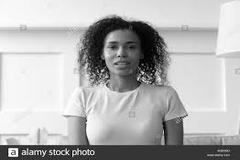

-----------------------------------------
[[0.05800011 0.9419999 ]]
1


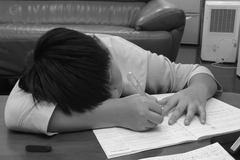

-----------------------------------------
[[0.99693596 0.00306399]]
0


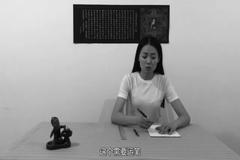

-----------------------------------------
[[0.03609825 0.9639018 ]]
1


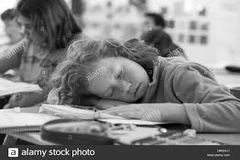

-----------------------------------------
[[0.00121228 0.9987877 ]]
1


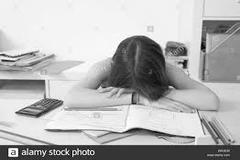

-----------------------------------------
[[0.7114311  0.28856885]]
0


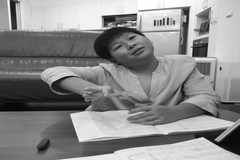

-----------------------------------------
[[0.00954281 0.99045724]]
1


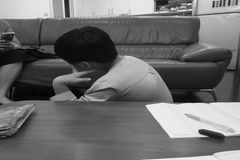

-----------------------------------------
[[0.00276163 0.9972384 ]]
1


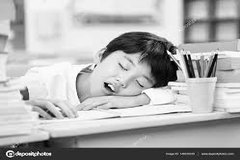

-----------------------------------------
[[9.9983704e-01 1.6293001e-04]]
0


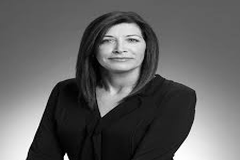

-----------------------------------------
[[0.00543181 0.9945682 ]]
1


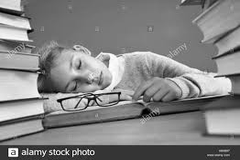

-----------------------------------------
[[0.02177884 0.9782211 ]]
1


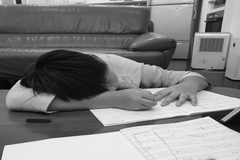

-----------------------------------------
[[0.00842625 0.99157375]]
1


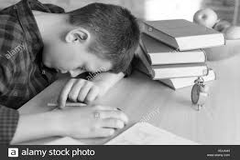

-----------------------------------------
[[0.9986526  0.00134741]]
0


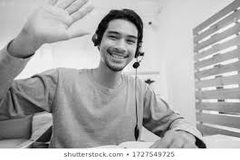

-----------------------------------------
[[0.9874801  0.01251989]]
0


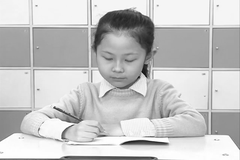

-----------------------------------------
[[0.97958654 0.02041342]]
0


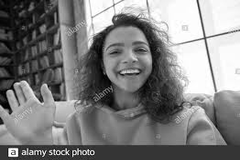

-----------------------------------------
[[0.9871296  0.01287039]]
0


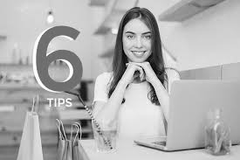

-----------------------------------------
[[0.88401765 0.11598232]]
0


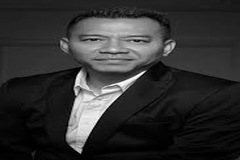

-----------------------------------------
[[0.96127945 0.0387205 ]]
0


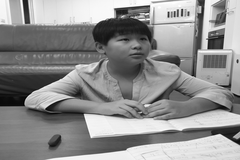

-----------------------------------------
[[0.9967964  0.00320354]]
0


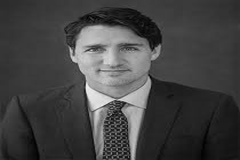

-----------------------------------------
[[0.8817827  0.11821728]]
0


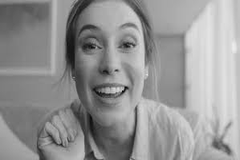

-----------------------------------------
[[0.9912081  0.00879193]]
0


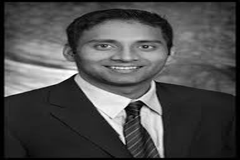

-----------------------------------------
[[0.21530154 0.7846985 ]]
1


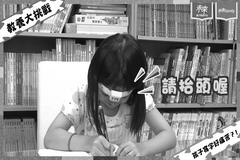

-----------------------------------------
[[0.96967626 0.03032379]]
0


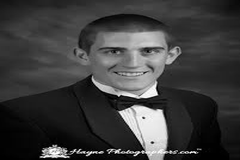

-----------------------------------------
[[1.5910658e-04 9.9984086e-01]]
1


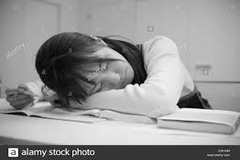

-----------------------------------------


In [28]:
for img in list_of_files:

    # # input_shape=(image_height, image_width, 1) : (320,480,1) 
    im = Image.open('./datat/{}'.format(img)).convert('L')       #.convert('L')  
    im0 = im.resize((240, 160),Image.ANTIALIAS)   
    im1 = im.resize((image_width, image_height), Image.ANTIALIAS)   # image_width, image_height  (64, 48)
    ima = np.array(im1)  # input_shape=(image_height, image_width, 1) : (320,480,1) 
    ima = ima.reshape(1,image_height, image_width,1)  # !!!!!!!!!!!!!!!!  (1, 320,480,1)
    test_image = np.expand_dims(ima[0], axis=0).astype(np.float32)
    interpreter.set_tensor(input_index, test_image/255.0)
    interpreter.invoke() #啟動解釋器-執行推論(inference)
    predictions = interpreter.get_tensor(output_index) #取得輸出結果
    print(predictions)
    print(predictions.argmax())
    display(im0)
    print('-----------------------------------------')

[[0.9923539 0.0076461]]
0


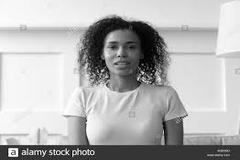

-----------------------------------------
[[0.05800011 0.9419999 ]]
1


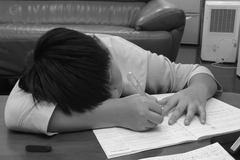

-----------------------------------------
[[0.99693596 0.00306399]]
0


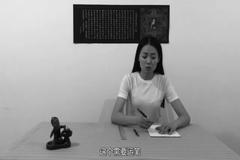

-----------------------------------------
[[0.03609825 0.9639018 ]]
1


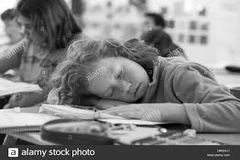

-----------------------------------------
[[0.00121228 0.9987877 ]]
1


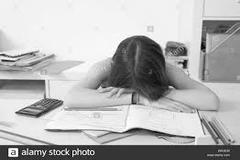

-----------------------------------------
[[0.7114311  0.28856885]]
0


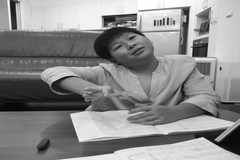

-----------------------------------------
[[0.00954281 0.99045724]]
1


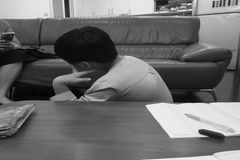

-----------------------------------------
[[0.00276163 0.9972384 ]]
1


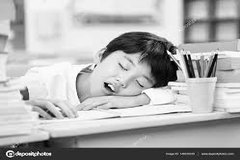

-----------------------------------------
[[9.9983704e-01 1.6293001e-04]]
0


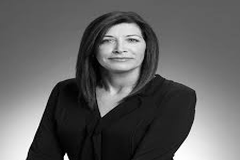

-----------------------------------------
[[0.00543181 0.9945682 ]]
1


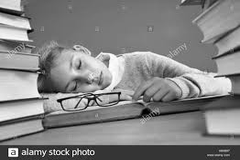

-----------------------------------------
[[0.02177884 0.9782211 ]]
1


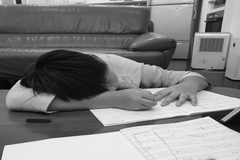

-----------------------------------------
[[0.00842625 0.99157375]]
1


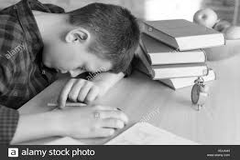

-----------------------------------------
[[0.9986526  0.00134741]]
0


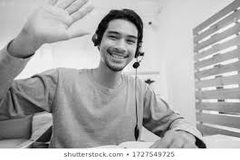

-----------------------------------------
[[0.9874801  0.01251989]]
0


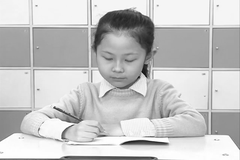

-----------------------------------------
[[0.97958654 0.02041342]]
0


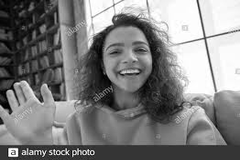

-----------------------------------------
[[0.9871296  0.01287039]]
0


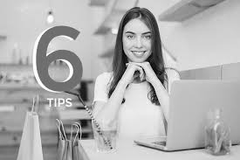

-----------------------------------------
[[0.88401765 0.11598232]]
0


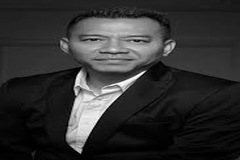

-----------------------------------------
[[0.96127945 0.0387205 ]]
0


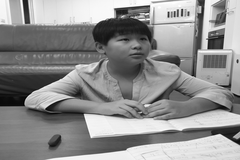

-----------------------------------------
[[0.9967964  0.00320354]]
0


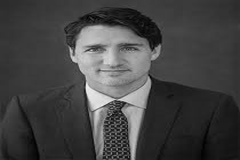

-----------------------------------------
[[0.8817827  0.11821728]]
0


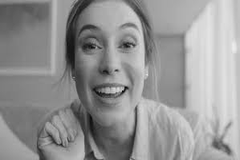

-----------------------------------------
[[0.9912081  0.00879193]]
0


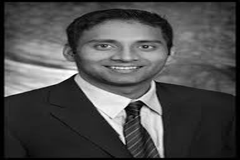

-----------------------------------------
[[0.21530154 0.7846985 ]]
1


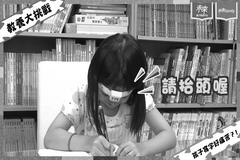

-----------------------------------------
[[0.96967626 0.03032379]]
0


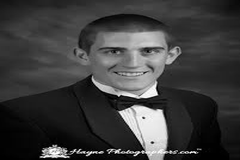

-----------------------------------------
[[1.5910658e-04 9.9984086e-01]]
1


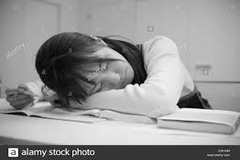

-----------------------------------------


In [29]:
for img in list_of_files:

    # # Opens a image in RGB mode  
    im = Image.open('./datat/{}'.format(img)).convert('L')       #.convert('L')  
    im0 = im.resize((240, 160),Image.ANTIALIAS) 
    im1 = im.resize((image_width, image_height), Image.ANTIALIAS)    # image_width, image_height  (64, 48)
    ima = np.array(im1)  # input_size = (48, 64) image_height , image_width
    ima = ima.reshape(1,image_height, image_width,1)  # !!!!!!!!!!!!!!!!  (1, 48, 64, 1)
    test_image = np.expand_dims(ima[0], axis=0).astype(np.float32)
    interpreter_quant.set_tensor(input_indexq, test_image/255.0)
    interpreter_quant.invoke() #啟動解釋器-執行推論(inference)
    predictions = interpreter_quant.get_tensor(output_indexq) #取得輸出結果
    print(predictions)
    print(predictions.argmax())
    display(im0)
    print('-----------------------------------------')

In [30]:
### cut video to img job 

#import cv2
# import time
# sourcepath='C:\\Application\\Edge_AI\\tiny-ai-proj\\video\\'
# sourcefile='2013chen-mei-ling-lao-shi-ti-gong-wo-bi-zi-shi-jiao-fa-you-shou-cuo-wu-dao-zheng-que.mp4'
# sno=str(time.time())[-5:-1]

# vidcap = cv2.VideoCapture(sourcepath+sourcefile)
# success,image = vidcap.read()
# count = 0
# success = True
# while success:
#     success,image = vidcap.read()
#     if count%100==0:
#         cv2.imwrite("./datau/frame{}{}.jpg".format(sno, count), image)     # save frame as JPEG file
#     elif cv2.waitKey(10) == 27:                     # exit if Escape is hit
#         break
#     count += 1

In [31]:
! xxd -i "g_person_detect_model_data" > person_detect_model_data.cpp

In [32]:
! ls person_detect_model_data.cpp -l

-rw-r--r-- 1 Kneron Kneron 56145 Dec  5 14:36 person_detect_model_data.cpp


In [33]:
# cp ./person_detect_model_data.cpp ../

In [34]:
myimgarr = []

In [35]:
myimgarr = []

In [36]:
myimgarr = []

In [37]:
myimgarr = []

In [38]:
myimgarr = []

In [39]:
myimgarr = []

In [40]:
myimgarr = [61, 135, 149, 156, 163, 125, 158, 164, 164, 166, 154, 166, 167, 170, 168, 167, 166, 165, 163, 159, 127, 121, 120, 111, 111, 139, 133, 130, 128, 127, 126, 124, 66, 125, 154, 157, 161, 162, 160, 166, 168, 167, 168, 170, 171, 170, 170, 143, 174, 164, 152, 168, 159, 153, 151, 146, 103, 137, 129, 131, 133, 137, 142, 140, 75, 145, 155, 160, 164, 165, 167, 171, 171, 172, 171, 159, 158, 178, 173, 172, 173, 175, 175, 170, 161, 155, 151, 147, 92, 138, 135, 131, 131, 254, 255, 255, 74, 64, 157, 160, 164, 166, 156, 176, 179, 177, 177, 175, 174, 175, 174, 173, 183, 190, 195, 190, 166, 151, 146, 147, 129, 138, 137, 138, 255, 255, 255, 255, 56, 60, 150, 164, 167, 173, 181, 188, 194, 189, 182, 178, 179, 178, 175, 162, 173, 255, 255, 255, 115, 101, 152, 149, 154, 141, 138, 140, 253, 230, 149, 131, 68, 52, 92, 161, 169, 176, 190, 202, 251, 255, 196, 182, 180, 168, 179, 179, 188, 255, 218, 105, 71, 65, 67, 145, 139, 54, 83, 133, 143, 141, 134, 122, 55, 68, 81, 149, 174, 178, 190, 255, 255, 255, 255, 189, 183, 182, 178, 173, 183, 176, 104, 80, 62, 61, 61, 85, 130, 125, 150, 113, 135, 132, 126, 121, 53, 64, 65, 165, 177, 183, 186, 196, 252, 227, 161, 176, 188, 186, 180, 183, 183, 121, 69, 62, 71, 56, 52, 53, 149, 146, 145, 144, 142, 135, 128, 119, 49, 57, 57, 179, 181, 185, 188, 192, 198, 184, 175, 177, 181, 184, 185, 184, 184, 57, 110, 114, 107, 63, 47, 47, 171, 148, 152, 159, 161, 143, 131, 124, 50, 55, 133, 108, 128, 190, 194, 189, 195, 193, 187, 191, 189, 187, 186, 185, 186, 66, 34, 150, 105, 101, 46, 48, 157, 155, 145, 255, 255, 146, 134, 125, 49, 52, 157, 117, 116, 197, 203, 206, 201, 196, 193, 183, 185, 187, 189, 190, 179, 183, 154, 158, 135, 126, 90, 48, 157, 158, 162, 165, 154, 143, 134, 112, 48, 59, 147, 94, 91, 255, 255, 255, 212, 191, 191, 193, 194, 193, 187, 194, 194, 153, 129, 126, 164, 107, 100, 65, 162, 162, 166, 161, 149, 142, 136, 135, 42, 62, 168, 103, 115, 174, 212, 183, 157, 203, 204, 205, 206, 212, 201, 208, 204, 172, 169, 121, 90, 150, 101, 110, 144, 219, 255, 255, 121, 126, 137, 143, 48, 62, 78, 82, 104, 125, 194, 171, 241, 214, 215, 216, 218, 228, 221, 255, 231, 167, 147, 63, 171, 118, 115, 171, 174, 176, 183, 170, 164, 129, 109, 135, 47, 59, 75, 96, 98, 101, 213, 214, 255, 222, 223, 227, 228, 237, 226, 221, 217, 162, 126, 139, 155, 104, 228, 187, 176, 228, 187, 180, 174, 173, 175, 168, 51, 62, 108, 97, 87, 95, 238, 236, 255, 227, 230, 233, 233, 249, 163, 73, 170, 79, 228, 169, 154, 83, 213, 200, 204, 255, 215, 203, 207, 193, 204, 196, 48, 66, 98, 84, 82, 74, 174, 241, 255, 230, 233, 234, 237, 130, 79, 94, 144, 55, 177, 123, 111, 56, 71, 254, 255, 202, 255, 254, 255, 236, 255, 255, 44, 57, 139, 66, 75, 105, 237, 242, 255, 232, 236, 237, 80, 122, 47, 85, 178, 66, 152, 120, 107, 194, 49, 82, 102, 182, 255, 247, 255, 255, 255, 255, 43, 62, 63, 59, 65, 75, 229, 242, 255, 233, 238, 107, 51, 50, 53, 57, 194, 77, 155, 133, 78, 47, 58, 105, 90, 102, 255, 211, 255, 255, 255, 255, 44, 84, 61, 61, 71, 110, 227, 241, 255, 232, 227, 58, 133, 86, 86, 48, 26, 64, 170, 166, 52, 220, 48, 52, 89, 68, 92, 128, 100, 90, 91, 116, 46, 97, 72, 70, 70, 133, 255, 255, 251, 238, 75, 136, 110, 137, 141, 58, 114, 115, 162, 152, 156, 178, 203, 72, 47, 91, 54, 59, 60, 55, 57, 54, 44, 101, 66, 77, 140, 126, 246, 243, 171, 246, 36, 55, 60, 42, 83, 54, 111, 83, 166, 141, 147, 162, 195, 67, 46, 46, 41, 43, 46, 32, 46, 33, 44, 163, 54, 128, 156, 99, 240, 219, 200, 160, 159, 151, 54, 48, 50, 91, 77, 169, 41, 142, 120, 120, 145, 41, 41, 32, 40, 43, 58, 112, 112, 111, 37, 133, 160, 146, 164, 57, 49, 34, 116, 177, 111, 120, 109, 88, 38, 28, 198, 48, 33, 144, 52, 102, 103, 47, 74, 50, 22, 32, 29, 28, 29, 27, 45, 92, 140, 128, 63, 49, 60, 31, 100, 41, 53, 98, 117, 119, 65, 27, 180, 37, 35, 41, 35, 30, 36, 33, 44, 33, 60, 28, 27, 19, 29, 63, 34, 90, 123, 126, 69, 84, 29, 42, 168, 70, 50, 75, 34, 55, 98, 81, 35, 49, 50, 78, 30, 36, 55, 81, 93, 60, 39, 26, 22, 17, 29, 22, 53, 81, 114, 88, 108, 46, 214, 57, 238, 34, 139, 73, 36, 26, 87, 30, 39, 40, 108, 31, 33, 77, 60, 67, 30, 64, 68, 25, 23, 35, 44, 28, 101, 89, 80, 93, 112, 90, 108, 160, 25, 79, 32, 65, 30, 47, 36, 34, 33, 49, 112, 45, 25, 58, 36, 29, 27, 28, 21, 23, 23, 28, 30, 32, 104, 144, 95, 90, 106, 118, 109, 192, 55, 70, 58, 23, 27, 21, 92, 97, 28, 34, 28, 29, 32, 57, 70, 27, 30, 23, 24, 25, 22, 22, 26, 20, 193, 87, 99, 98, 94, 143, 144, 187, 31, 42, 72, 63, 132, 65, 53, 58, 75, 65, 30, 25, 21, 46, 54, 28, 26, 55, 40, 21, 21, 17, 65, 16, 67, 69, 70, 78, 104, 136, 142, 174, 27, 25, 44, 148, 132, 35, 31, 39, 32, 24, 25, 22, 21, 32, 27, 23, 26, 43, 42, 24, 21, 13, 54, 41, 57, 65, 72, 84, 102, 123, 137, 141, 136, 127, 93, 150, 130, 108, 28, 41, 65, 42, 24, 22, 22, 22, 22, 22, 23, 19, 39, 34, 45, 19, 67, 44]

In [41]:
myimgarr = [152, 176, 179, 182, 182, 146, 185, 187, 189, 191, 181, 190, 191, 192, 193, 191, 191, 190, 187, 183, 148, 141, 139, 137, 136, 157, 153, 149, 146, 145, 145, 143, 162, 166, 181, 183, 186, 187, 175, 191, 193, 193, 193, 194, 195, 196, 195, 163, 193, 170, 193, 192, 184, 177, 170, 165, 118, 157, 150, 151, 151, 159, 163, 163, 174, 179, 183, 185, 188, 191, 193, 192, 196, 197, 198, 173, 175, 197, 197, 196, 197, 201, 203, 199, 189, 180, 172, 165, 112, 157, 154, 146, 148, 255, 255, 255, 178, 180, 184, 186, 189, 186, 189, 206, 204, 203, 202, 199, 208, 200, 199, 199, 210, 219, 230, 224, 194, 169, 170, 167, 153, 157, 156, 158, 255, 255, 255, 255, 175, 179, 188, 190, 193, 200, 207, 216, 221, 218, 207, 203, 203, 201, 196, 193, 214, 255, 255, 255, 237, 182, 172, 168, 174, 159, 157, 160, 246, 213, 138, 156, 191, 192, 183, 195, 196, 201, 216, 253, 255, 255, 222, 208, 205, 188, 204, 203, 210, 255, 255, 185, 127, 86, 70, 68, 164, 58, 116, 148, 160, 157, 150, 139, 209, 199, 192, 187, 201, 204, 216, 255, 255, 255, 255, 215, 209, 205, 197, 204, 175, 161, 144, 121, 91, 73, 73, 55, 63, 84, 147, 134, 152, 151, 141, 136, 255, 255, 212, 205, 207, 210, 208, 223, 254, 222, 161, 187, 211, 210, 212, 197, 125, 107, 96, 85, 73, 72, 65, 66, 102, 71, 142, 141, 154, 149, 141, 136, 253, 229, 216, 210, 212, 214, 215, 219, 225, 215, 200, 206, 213, 213, 208, 128, 83, 88, 76, 59, 61, 54, 54, 52, 60, 65, 66, 165, 165, 153, 148, 138, 152, 202, 205, 210, 212, 221, 224, 215, 225, 221, 208, 217, 213, 211, 127, 105, 99, 85, 66, 57, 53, 57, 60, 53, 52, 51, 57, 215, 255, 164, 149, 141, 188, 167, 157, 200, 221, 229, 235, 238, 231, 223, 218, 200, 211, 203, 122, 109, 69, 74, 59, 53, 45, 42, 50, 61, 45, 53, 53, 66, 119, 156, 149, 128, 211, 196, 193, 188, 191, 255, 255, 255, 245, 218, 218, 217, 220, 126, 111, 81, 71, 66, 56, 51, 52, 52, 55, 58, 51, 55, 46, 48, 65, 121, 150, 152, 220, 211, 218, 253, 255, 213, 224, 222, 170, 232, 233, 234, 234, 115, 72, 56, 55, 61, 52, 49, 47, 44, 48, 60, 41, 49, 45, 40, 51, 130, 147, 160, 225, 219, 233, 255, 255, 255, 224, 199, 249, 243, 245, 246, 243, 96, 63, 62, 67, 58, 49, 46, 47, 47, 44, 40, 40, 41, 46, 48, 44, 135, 220, 222, 226, 227, 237, 255, 255, 255, 245, 246, 255, 249, 215, 95, 154, 83, 67, 56, 51, 50, 45, 47, 42, 52, 65, 40, 42, 44, 52, 52, 54, 139, 188, 183, 227, 226, 238, 255, 255, 255, 255, 255, 232, 163, 155, 83, 163, 85, 54, 54, 53, 55, 52, 47, 35, 46, 43, 50, 43, 62, 66, 45, 73, 59, 178, 208, 224, 226, 236, 255, 255, 255, 255, 255, 168, 207, 182, 84, 107, 66, 60, 52, 47, 44, 53, 43, 43, 34, 49, 49, 54, 48, 50, 43, 56, 65, 221, 255, 223, 225, 234, 248, 255, 255, 211, 93, 89, 99, 166, 218, 96, 69, 58, 54, 45, 48, 44, 41, 40, 41, 44, 37, 38, 39, 52, 46, 46, 65, 179, 255, 222, 221, 230, 239, 217, 154, 134, 65, 51, 141, 175, 165, 117, 130, 55, 47, 44, 40, 39, 37, 40, 37, 41, 36, 33, 37, 38, 43, 39, 51, 198, 255, 236, 178, 66, 108, 86, 107, 99, 51, 52, 85, 97, 212, 146, 73, 49, 40, 41, 39, 40, 36, 36, 37, 37, 34, 36, 36, 35, 35, 37, 41, 66, 124, 173, 141, 65, 59, 56, 73, 113, 68, 45, 78, 64, 186, 107, 54, 43, 40, 42, 37, 34, 34, 32, 36, 33, 31, 30, 34, 35, 31, 35, 31, 37, 64, 125, 60, 128, 51, 48, 93, 64, 71, 34, 119, 34, 116, 72, 59, 51, 48, 41, 34, 31, 31, 29, 31, 29, 30, 28, 30, 31, 29, 29, 28, 35, 31, 130, 96, 77, 49, 43, 62, 61, 49, 56, 51, 60, 90, 65, 66, 68, 53, 35, 33, 28, 28, 27, 29, 26, 25, 27, 25, 26, 26, 24, 27, 27, 56, 70, 146, 112, 52, 42, 48, 41, 46, 42, 35, 37, 85, 71, 97, 94, 58, 38, 33, 27, 25, 25, 26, 24, 24, 24, 23, 23, 22, 21, 25, 37, 44, 77, 42, 64, 105, 53, 53, 83, 132, 33, 32, 34, 91, 67, 108, 89, 43, 37, 32, 26, 26, 24, 26, 23, 22, 22, 21, 21, 32, 24, 23, 25, 77, 41, 39, 29, 120, 79, 54, 48, 61, 36, 105, 19, 163, 64, 95, 99, 58, 34, 31, 27, 25, 23, 22, 21, 21, 19, 18, 20, 23, 21, 21, 24, 66, 154, 35, 47, 38, 39, 45, 63, 33, 33, 29, 112, 140, 143, 126, 52, 53, 39, 29, 25, 22, 23, 21, 22, 22, 20, 23, 19, 21, 22, 19, 23, 45, 44, 27, 50, 70, 40, 40, 41, 46, 75, 147, 139, 67, 122, 126, 132, 110, 69, 41, 28, 23, 22, 22, 21, 21, 19, 23, 21, 21, 21, 20, 27, 25, 36, 33, 44, 61, 40, 34, 35, 71, 94, 138, 150, 145, 116, 97, 104, 98, 70, 66, 31, 24, 21, 21, 21, 19, 21, 29, 23, 21, 22, 21, 19, 18, 44, 42, 54, 44, 45, 54, 46, 64, 85, 106, 120, 148, 156, 153, 123, 82, 84, 51, 47, 36, 28, 26, 26, 28, 26, 27, 24, 18, 18, 19, 19, 18, 62, 61, 63, 42, 42, 44, 39, 50, 60, 80, 122, 134, 125, 136, 128, 106, 79, 64, 40, 32, 35, 38, 36, 42, 36, 21, 20, 31, 17, 21, 43, 25, 75, 73, 72, 65, 63, 67, 62, 62, 71, 78, 44, 105, 108, 96, 92, 79, 69, 76, 79, 65, 34, 24, 32, 36, 32, 19, 32, 17, 18, 17, 43, 26]

In [42]:
print(len(myimgarr))

1024


(1024,)
152
(32, 32)
(600, 600)


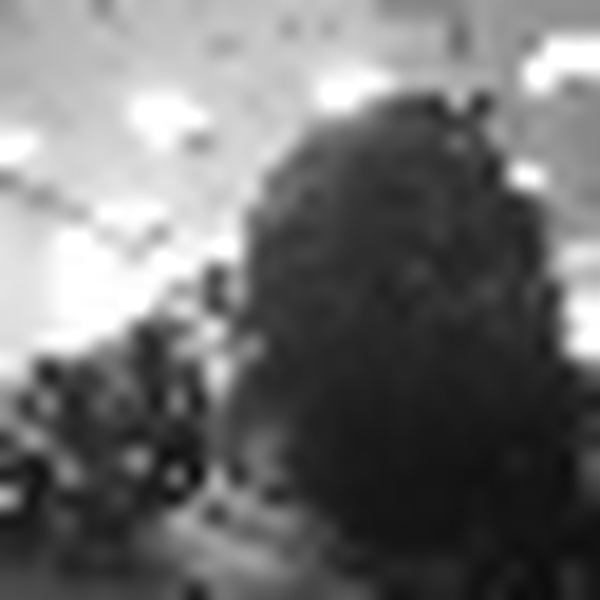

In [43]:
# 76800 /3 25600 160 160 
# myimgarr = myimgarr[:146523]
myarr = np.array(myimgarr)
print(myarr.shape)
myarr = myarr.reshape(32,32)
print(myarr[0][0])
print(myarr.shape)
myimg = Image.fromarray(np.uint8(myarr))  # ,'L'
# print(myimg.size)
myimg = myimg.resize((600, 600), Image.ANTIALIAS)
print(myimg.size)
display(myimg)